# 生成例

In [7]:
% matplotlib inline
import os
import pickle
import skimage.io
import torch
from torch.autograd import Variable
from torchvision import transforms
from build_vocab import Vocab
from data_loader import Rescale
from models import EncoderCNN
from models import FactoredLSTM

load vocab, models, transform

In [3]:
# load vocablary
with open('data/vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)

# build model
encoder = EncoderCNN(300)
decoder = FactoredLSTM(300, 512, 512, len(vocab))

encoder.load_state_dict(torch.load('pretrained_models/encoder-30.pkl'))
decoder.load_state_dict(torch.load('pretrained_models/decoder-30.pkl'))

# prepare images
transform = transforms.Compose([
    Rescale((224, 224)),
    transforms.ToTensor()
    ])

caption genereation

/home/kakiuchi/.pyenv/versions/3.5.3/envs/py3.5env/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<s> a girl sits on a tree stump while covered with her head sits watching </s>
<s> the dog is running after a ball and stirring up dust , trying to get a ball </s>


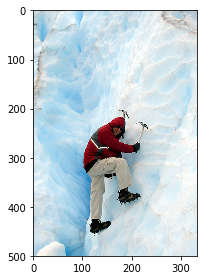

In [8]:
# load image
image = skimage.io.imread(os.path.join('sample_images', '363560757.jpg'))
skimage.io.imshow(image)
image = transform(image).unsqueeze(0)
image = Variable(image)

# caption generation
feature = encoder(image)
output = decoder.sample(feature, mode='factual')
caption = [vocab.i2w[x] for x in output]
print(' '.join(caption))

output = decoder.sample(feature, mode='humorous')
caption = [vocab.i2w[x] for x in output]
print(' '.join(caption))

/home/kakiuchi/.pyenv/versions/3.5.3/envs/py3.5env/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<s> a little girl is sitting on a wooden horse and holding a pink umbrella like a riding on the sidewalk </s>
<s> the girl in the red shirt smiles on the swing imagining that she is a princess </s>


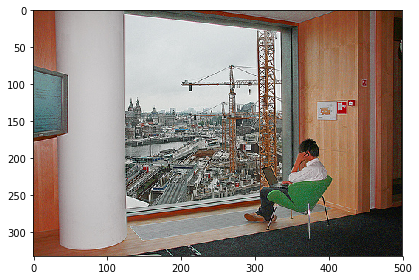

In [9]:
# load image
image = skimage.io.imread(os.path.join('sample_images', '2737409349.jpg'))
skimage.io.imshow(image)
image = transform(image).unsqueeze(0)
image = Variable(image)

# caption generation
feature = encoder(image)
output = decoder.sample(feature, mode='factual')
caption = [vocab.i2w[x] for x in output]
print(' '.join(caption))

output = decoder.sample(feature, mode='humorous')
caption = [vocab.i2w[x] for x in output]
print(' '.join(caption))

/home/kakiuchi/.pyenv/versions/3.5.3/envs/py3.5env/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<s> two children are sitting on the ground in front of a large wooden door </s>
<s> the girl in the red shirt smiles on the swing imagining that she is a princess </s>


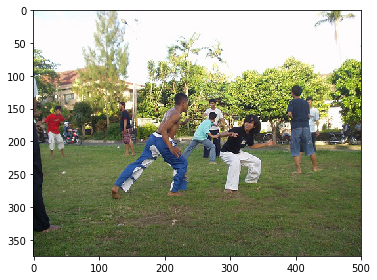

In [10]:
# load image
image = skimage.io.imread(os.path.join('sample_images', '2386366490.jpg'))
skimage.io.imshow(image)
image = transform(image).unsqueeze(0)
image = Variable(image)

# caption generation
feature = encoder(image)
output = decoder.sample(feature, mode='factual')
caption = [vocab.i2w[x] for x in output]
print(' '.join(caption))

output = decoder.sample(feature, mode='humorous')
caption = [vocab.i2w[x] for x in output]
print(' '.join(caption))